In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import scatter_matrix

# Set pandas to display all columns
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('NSDUH_2023_Cleaned.csv')
df

,CATAGE,EDUHIGHCAT,EDUSCHLGO,EDUSCHGRD2,UADPAID,UADMONY,UADBWHO,UADPLACE,UADBUND,TOBCIGONL,TOBFLAG,TOBYR,TOBMON,NICVAPFLAG,NICVAPYR,NICVAPMON,TOBVNICFLAG,TOBVNICYR,TOBVNICMON,TOBVAPONL2,TOBCIGVAP2,COCYR,COCMON,HERPNRYR,ILLFLAG,ILLMON,ILLEMYR,CDUFLAG,DCIGMON,BNGDRKMON,HVYDRKMON,TOBALCFLG,TOBALCYR,TOBALCMN,YELSTGRD,YERLFRND,AVGGRADE,SMIPY,AMIPY,ATXMDEYR,MHTRTPY,CAMHPROB
0,1,5,1,3,3.0,3.0,3.0,4.0,3.0,4,0,0,0,0,0,0,0,0,0,4,4,0,0,4,0,0,0,0,0,0,0,0,0,0,1,3,2.0,NaN,NaN,NaN,0,99
1,2,2,2,99,1.0,1.0,1.0,2.0,3.0,3,1,1,1,1,1,1,1,1,1,2,3,0,0,4,0,0,0,1,0,0,0,1,1,1,99,99,NaN,0.0,0.0,NaN,0,2
2,3,4,2,99,3.0,3.0,3.0,4.0,3.0,4,1,0,0,1,0,0,1,0,0,4,4,0,0,4,1,1,1,0,0,1,0,1,1,1,99,99,NaN,0.0,0.0,NaN,0,1
3,3,4,2,99,3.0,3.0,3.0,4.0,3.0,4,0,0,0,0,0,0,0,0,0,4,4,0,0,4,0,0,0,0,0,0,0,1,1,1,99,99,NaN,0.0,0.0,NaN,0,2
4,1,5,1,6,3.0,3.0,3.0,4.0,3.0,4,0,0,0,0,0,0,0,0,0,4,4,0,0,4,1,1,0,0,0,0,0,0,0,0,2,1,2.0,NaN,NaN,NaN,0,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30258,2,3,1,10,3.0,3.0,3.0,4.0,3.0,4,0,0,0,0,0,0,0,0,0,4,4,0,0,4,0,0,0,0,0,0,0,0,0,0,99,99,NaN,0.0,1.0,NaN,0,2
30259,2,3,1,10,3.0,3.0,3.0,4.0,3.0,4,0,0,0,0,0,0,0,0,0,4,4,0,0,4,0,0,0,0,0,0,0,0,0,0,99,99,NaN,0.0,0.0,NaN,0,2
30260,3,4,2,99,3.0,3.0,3.0,4.0,3.0,4,1,0,0,0,0,0,1,0,0,4,4,0,0,4,0,0,0,0,0,0,0,1,1,1,99,99,NaN,0.0,0.0,1.0,1,1
30261,2,2,2,99,3.0,3.0,3.0,4.0,3.0,4,1,0,0,1,1,0,1,1,0,4,4,0,0,4,1,1,0,0,0,1,0,1,1,1,99,99,NaN,0.0,1.0,1.0,1,1


In [3]:
use_columns = [col for col in df.columns if sorted(df[col].unique()) == [0, 1]]
use_columns = use_columns[:len(use_columns)-1]
use_columns

['TOBFLAG',
 'TOBYR',
 'TOBMON',
 'NICVAPFLAG',
 'NICVAPYR',
 'NICVAPMON',
 'TOBVNICFLAG',
 'TOBVNICYR',
 'TOBVNICMON',
 'COCYR',
 'COCMON',
 'ILLFLAG',
 'ILLMON',
 'ILLEMYR',
 'CDUFLAG',
 'DCIGMON',
 'BNGDRKMON',
 'HVYDRKMON',
 'TOBALCFLG',
 'TOBALCYR',
 'TOBALCMN']

In [4]:
diag_columns = ['SMIPY', 'AMIPY', 'ATXMDEYR', 'MHTRTPY']
diag_columns

['SMIPY', 'AMIPY', 'ATXMDEYR', 'MHTRTPY']

In [5]:
# Filter out columns in your dataframe
df_filtered = df[use_columns + diag_columns]

# Compute the correlation matrix
correlation_matrix = df_filtered.corr()

# Extract correlations between use_columns and comb_columns
correlation_subset = correlation_matrix.loc[diag_columns, use_columns]

# Display the correlation results
correlation_subset

,TOBFLAG,TOBYR,TOBMON,NICVAPFLAG,NICVAPYR,NICVAPMON,TOBVNICFLAG,TOBVNICYR,TOBVNICMON,COCYR,COCMON,ILLFLAG,ILLMON,ILLEMYR,CDUFLAG,DCIGMON,BNGDRKMON,HVYDRKMON,TOBALCFLG,TOBALCYR,TOBALCMN
SMIPY,0.091628,0.077574,0.057614,0.103721,0.095440,0.090741,0.089973,0.083563,0.078949,0.077226,0.038520,0.153482,0.136065,0.135167,0.090140,0.055063,0.033662,0.043581,0.081416,0.063247,0.055877
AMIPY,0.110181,0.087608,0.063965,0.137773,0.117334,0.108122,0.117112,0.102942,0.094061,0.086752,0.049863,0.221924,0.168450,0.157074,0.099495,0.057829,0.046005,0.052428,0.117459,0.108207,0.091452
ATXMDEYR,-0.015780,-0.016215,-0.028985,-0.034274,-0.032194,-0.018213,-0.026135,-0.027043,-0.030224,0.010080,-0.021797,0.034766,0.043665,0.034208,-0.030178,-0.002531,-0.024213,-0.035127,0.017189,0.005887,0.003770
MHTRTPY,0.046818,0.025949,0.006124,0.069612,0.062494,0.056457,0.061317,0.046362,0.035690,0.050151,0.022478,0.124249,0.098480,0.110547,0.025905,0.004628,0.008518,0.015438,0.034612,0.040129,0.033048


In [6]:
correlation_subset.max().sort_values(ascending=False)

ILLFLAG        0.221924
ILLMON         0.168450
ILLEMYR        0.157074
NICVAPFLAG     0.137773
TOBALCFLG      0.117459
NICVAPYR       0.117334
TOBVNICFLAG    0.117112
TOBFLAG        0.110181
TOBALCYR       0.108207
NICVAPMON      0.108122
TOBVNICYR      0.102942
CDUFLAG        0.099495
TOBVNICMON     0.094061
TOBALCMN       0.091452
TOBYR          0.087608
COCYR          0.086752
TOBMON         0.063965
DCIGMON        0.057829
HVYDRKMON      0.052428
COCMON         0.049863
BNGDRKMON      0.046005
dtype: float64

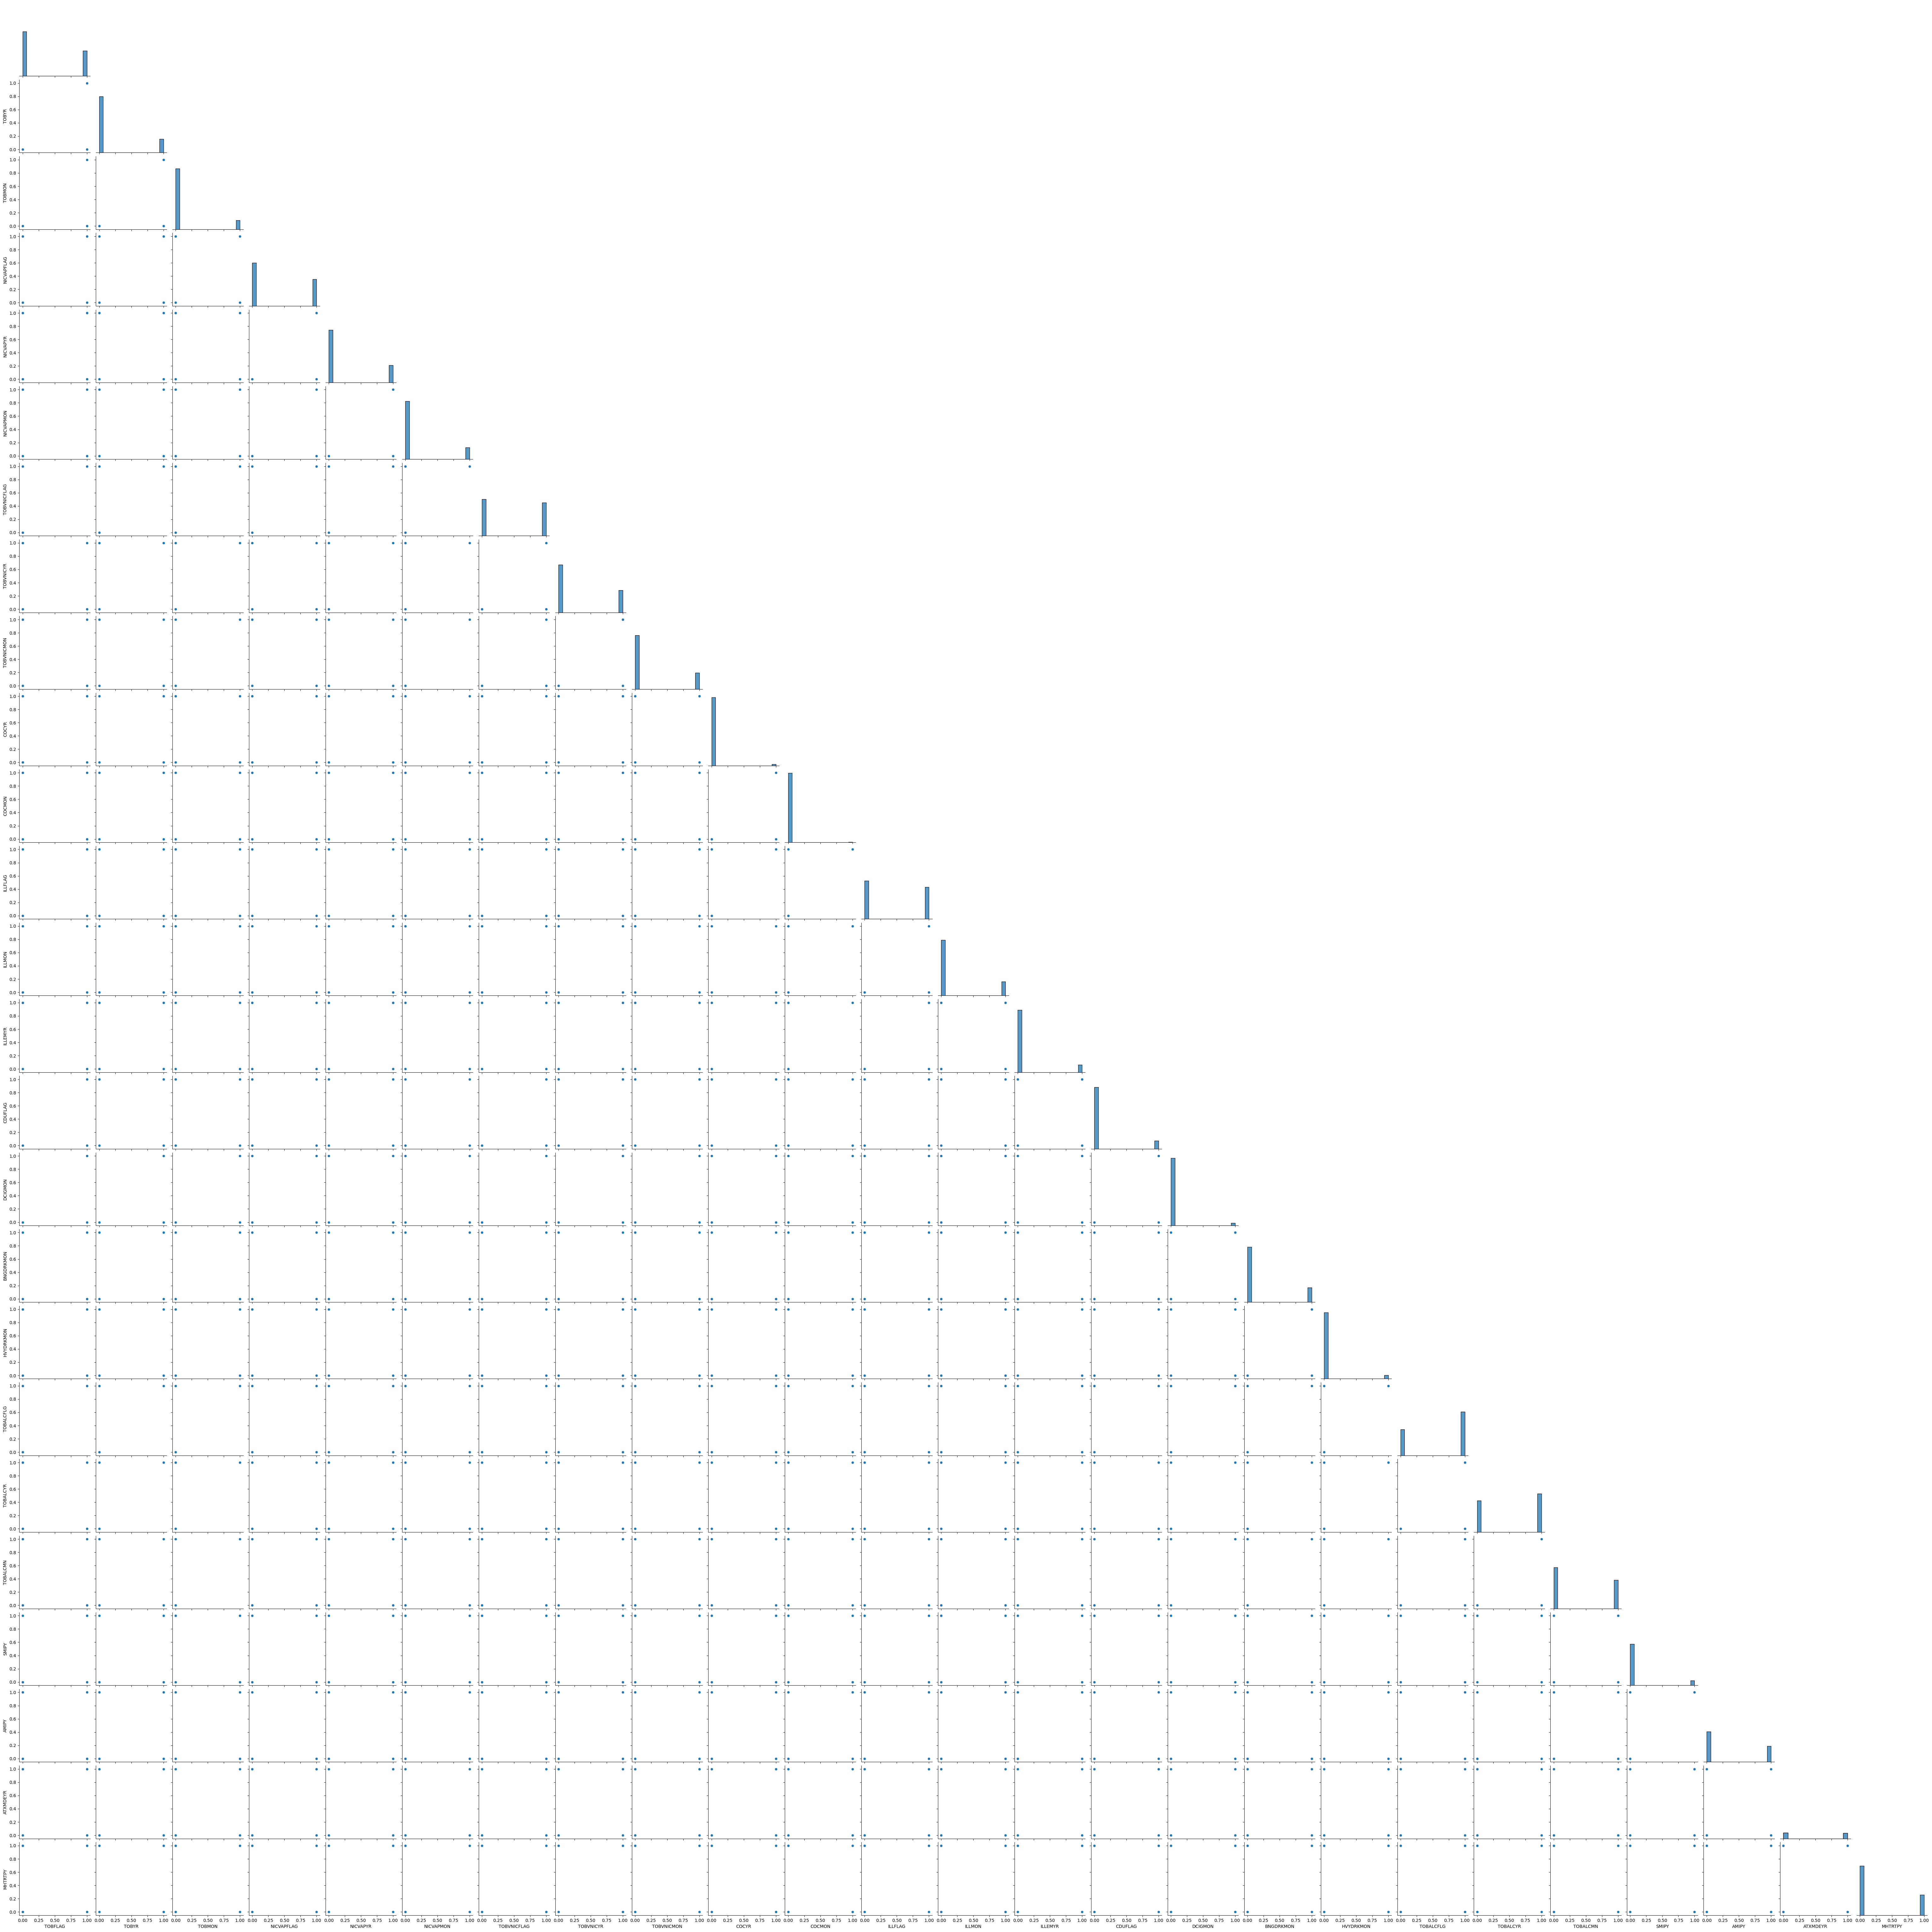

In [7]:
sns.pairplot(df_filtered,corner=True)

In [ ]:
fig, axes = plt.subplots(1, len(df_filtered), figsize=(10, 5))

for i, column in enumerate(df_filtered.columns):
    value_counts = df_filtered[column].value_counts()  # Get counts for unique values
    axes[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

KeyboardInterrupt: 

In [ ]:
prob_matrix = np.outer(df['Probability'], df['Probability'])

# Plot Probability Matrix
plt.figure(figsize=(6, 6))
plt.imshow(prob_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar(label="Probability")

# Add category labels
plt.xticks(ticks=np.arange(len(df['Category'])), labels=df['Category'])
plt.yticks(ticks=np.arange(len(df['Category'])), labels=df['Category'])

plt.title("Probability Matrix")
plt.show()